#### Rejection sampling

The Math:
- Goal: sample $X \sim g(x)$
- take a sample $y$ from distribution $Y \sim f(y)$ and a sample $u$ from $Unif(0, 1)$.
- If $u < \frac{f(y)}{Mg(y)}$, then accept $y$ from $f$

Now let's implement rand10 with rand7


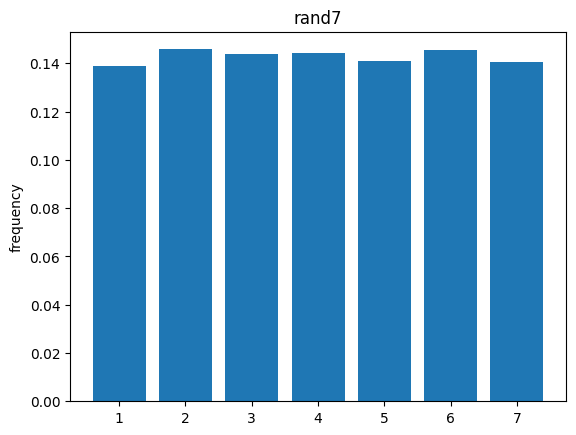

In [47]:
import random
import matplotlib.pyplot as plt

def rand7():
    return random.randint(1, 7)

def gen_histogram(raw_samples=None, title='default'):
    freq_dict = {}
    N = 0
    for x in raw_samples:
        N += 1
        if x not in freq_dict:
            freq_dict[x] = 1
        else:
            freq_dict[x] += 1

    fig, ax = plt.subplots()
    ax.bar(freq_dict.keys(), [v/N for v in freq_dict.values()])
    plt.ylabel('frequency')
    plt.title(title)
    plt.show()

samples = [rand7() for _ in range(10000)]
gen_histogram(samples, 'rand7')

Strict rejection sampling

$p(x) = 0.1$ if $x\in [1, 10]$

Let `y = (rand7-1) *7 + rand7`, then

$q(y) = 1/49$  if $y \in [1, 49]$

Let $M = 4.9$, then $p(y)/Mq(y) = 1$ if $y\in [1, 10]$

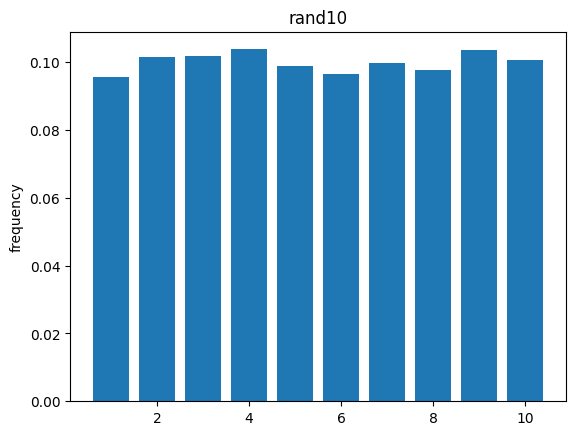

In [58]:
def rand10():
    y = (rand7() - 1)*7 +rand7()
    if y >= 1 and y <= 10:
        return y
    else:
        return rand10()
    
rand10()
samples = [rand10() for _ in range(10000)]
gen_histogram(samples, 'rand10')

Generalized idea of rejection sampling: 

As long as we ensure the conditional distribution is the same, then we can ensure a rejection framework works. This is because

$p(y) = \sum_x Pr(x) * Pr(y|x) = f(y) \sum_x Pr(x) = f(y)$, where we return a val at $xth$ attempts.

That being said, we let `y = (rand7-1) *7 + rand7`, then we can map all values not greater than 40 to [1, 10]




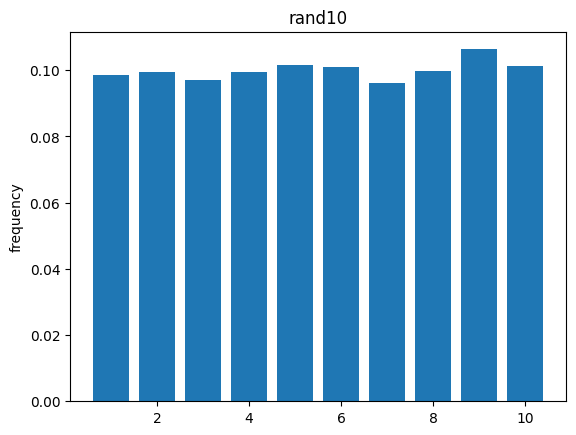

In [59]:
def rand10v2():
    y = (rand7() - 1)*7 +rand7()
    if y >= 1 and y <= 40:
        return y % 10 + 1
    else:
        return rand10()
    
rand10()
samples = [rand10() for _ in range(10000)]
gen_histogram(samples, 'rand10')